In [35]:
%pylab inline
import scipy.io
from sklearn import svm
DEBUG=True

Populating the interactive namespace from numpy and matplotlib


__Problem 1.__ Train a linear SVM using raw pixels as features. Plot the error rate on a validation set versus the number of training ex- amples that you used to train your classifier. Make sure you set aside 10,000 training images as a validation set. The number of training ex- amples in your experiment should be 100, 200, 500, 1,000, 2,000, 5,000, and 10,000. At this stage, you should expect accuracies between 70% and 90%.


In [2]:
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']

In [3]:
#Flatten the 28x28 images into 784 pixel long vectors 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat1= np.array(train_img_flat)

To debug and verify that the data partitioning is preserves a fairly uniform number of sample for each digit, I plot the histogram of the labels to visually verify that the histogram is approximately flat (i.e. uniform).

In [101]:
# num_labels = plt.hist(train_label[:,0])

In [46]:
shape(train_img_flat1)

(60000, 784)

In [47]:
train_img_flat = train_img.reshape((train_img.shape[2], -1))

Setting aside 10,000 images for validation 

Since this data is sorted , we need to pick randomly from the sample 

In [114]:
#get a list of 10100 unique random numbers for indexing 
N=1000
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

In [95]:
# plt.hist(rand_idx[:N])

In [112]:
shape(train_img_flat[0])

(784,)

In [115]:
train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)
if (DEBUG) : print shape(train_subset)
if (DEBUG) :print shape(labels_subset)

(1000, 784)
(1000,)


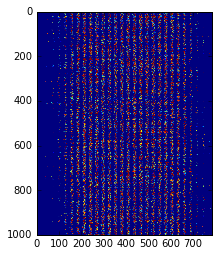

In [119]:
plt.imshow(train_subset)

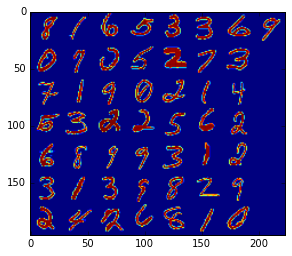

In [126]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,1000))[:,:,:50]))

In [128]:
labels_subset[:50]

array([8, 0, 7, 5, 6, 3, 2, 1, 7, 1, 3, 8, 1, 4, 6, 0, 9, 2, 9, 3, 2, 5, 5,
       0, 2, 9, 9, 6, 3, 2, 2, 5, 3, 8, 8, 3, 7, 1, 6, 1, 2, 1, 6, 3, 4, 2,
       2, 9, 0, 9], dtype=uint8)

In [96]:
# num_labels_subset = plt.hist(labels_subset)

In [102]:
shape(train_data)

(9000, 784)

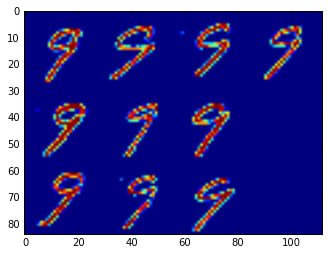

In [110]:
plt.imshow(montage_images(train_img[:,:,-10:]))

In [130]:
#Creating 10000 verification subset 
verify_train_subset = []
verify_labels_subset = []
for i in rand_idx[N:num_verification+N]:
    verify_train_subset.append(train_img_flat[i])
    verify_labels_subset.append(train_label[:,0][i])
verify_train_subset = np.array(verify_train_subset)
verify_labels_subset = np.array(verify_labels_subset)
if (DEBUG) : print shape(verify_train_subset)
if (DEBUG) :print shape(verify_labels_subset)

(10000, 784)
(10000,)


In [97]:
# num_labels_verify = plt.hist(verify_labels_subset)

In [57]:
clf = svm.LinearSVC()
clf.fit(train_subset,labels_subset)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [129]:
result = clf.predict(verify_train_subset)
# result2 = clf.predict(train_subset)

NameError: name 'verify_train_subset' is not defined

In [98]:
# plt.hist(result2)

In [99]:
# plt.hist(result)

In [63]:
print shape(verify_labels_subset)
print shape(result)

(10000,)
(10000,)


(0, 100)

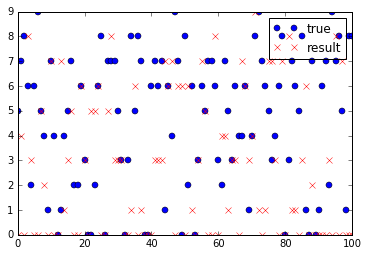

In [64]:
plt.plot(verify_labels_subset,'o',label="true")
plt.plot(result,'x',color="red",label="result")
plt.legend()
plt.xlim(0,100)

In [65]:
error_rate = benchmark(result,verify_labels_subset)[0]
wrong_labels = benchmark(result,verify_labels_subset)[1][0]
print error_rate

0.8367


In [89]:
# Code written by Kunal Marwaha on Piazza
import math
#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices
#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

In [98]:
def q1(N,DEBUG=False):
    #Flatten the 28x28 images into 784 pixel long vectors 
    train_img_flat = train_img.reshape((train_img.shape[2], -1))
    #get a list of 10000+N unique random numbers for indexing 
    num_verification = 10000
    s = set()
    while len(s) < N+num_verification:
        s.add(random.randint(60000))
    rand_idx=np.array(list(s))
    np.random.shuffle(rand_idx)
    if (DEBUG):print len(rand_idx) 
    #Creating N number of Training set/Labels 
    train_subset = []
    labels_subset = []
    for i in rand_idx[:N]:
        train_subset.append(train_img_flat[i])
        labels_subset.append(train_label[:,0][i])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    if (DEBUG) : print shape(train_subset)
    if (DEBUG) :print shape(labels_subset)
    #Creating 10000 verification subset 
    verify_train_subset = []
    verify_labels_subset = []
    for i in rand_idx[N:num_verification+N]:
        verify_train_subset.append(train_img_flat[i])
        verify_labels_subset.append(train_label[:,0][i])
    verify_train_subset = np.array(verify_train_subset)
    verify_labels_subset = np.array(verify_labels_subset)
    if (DEBUG) : print shape(verify_train_subset)
    if (DEBUG) :print shape(verify_labels_subset)
    #Training SVM classifier
    clf = svm.LinearSVC()
    clf.fit(train_subset,labels_subset)
    result = clf.predict(verify_train_subset)
    error_rate = benchmark(result,verify_labels_subset)[0]
    wrong_labels = benchmark(result,verify_labels_subset)[1][0]
    print ("N={}".format(N))
    conf_mat = metrics.confusion_matrix(verify_labels_subset,result)
    print("Confusion matrix:\n%s" % conf_mat)
    plot_confusion_matrix(conf_mat)
    return error_rate

N=100
Confusion matrix:
[[  1  14   4   2   7   1  17   9  33 921]
 [ 13  72  57  26  74  16  78  79 153 540]
 [  4  44  86  42 116  63  92 101 147 309]
 [  5  36  74  36 115  62 105 100 190 296]
 [  8  66  76  32  92  75  98  80 163 280]
 [  3  44  77  31  75 110  92  97 147 205]
 [  7  51  90  32 121  76 105 103 159 280]
 [  3  59  78  41 118  73  89  96 160 286]
 [  3  73  74  39  74  15  83  91 140 388]
 [  7  55  23  11  28   3  29  37  72 737]]
N=200
Confusion matrix:
[[885  31   9   5  11   5  11   7   6  14]
 [507 119  64  34  99  40  72  72  54  54]
 [249  75  57  51 121  60 134  84  72  41]
 [237  97  62  58 140  50 116 101  77  57]
 [260 121  56  50 110  58 127 108  50  47]
 [187  77  52  92 142  58 103  96  61  41]
 [277 103  71  65 135  52 118 121  59  56]
 [277  98  68  75 137  53 137 101  53  45]
 [384  88  59  46 100  42  87  67  61  45]
 [686  72  24  17  27  10  45  33  37  35]]
N=500
Confusion matrix:
[[ 10  28  20   3  14   5  26  53  11 835]
 [ 19 114  59  46  56  

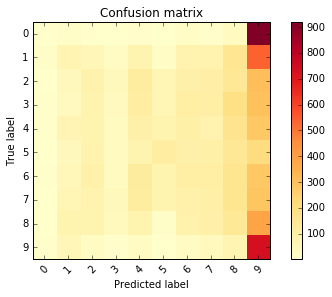

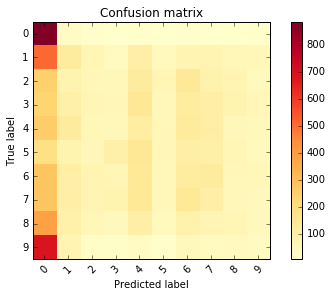

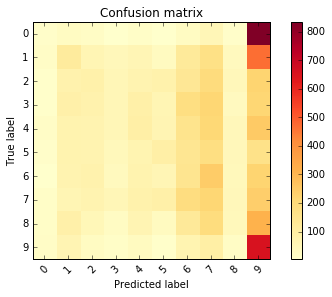

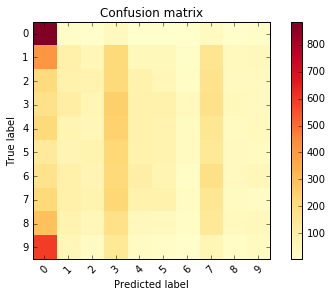

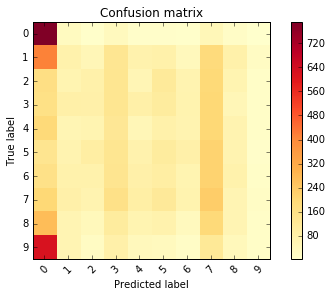

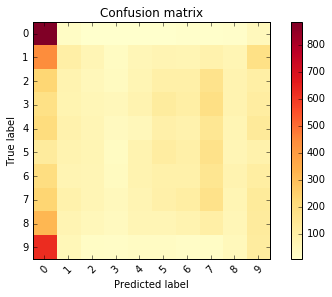

In [99]:
err_lst = []
trainset_size = [100, 200, 500, 1000, 2000, 5000]
for i in trainset_size:
    err_lst.append(q1(i))

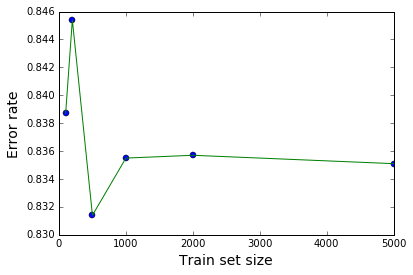

In [71]:
plt.plot(trainset_size,err_lst,'o')
plt.plot(trainset_size,err_lst,'-')
plt.xlabel("Train set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)

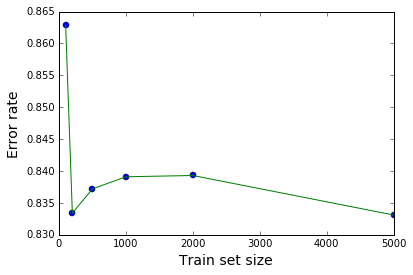

In [76]:
plt.plot(trainset_size,err_lst,'o')
plt.plot(trainset_size,err_lst,'-')
plt.xlabel("Train set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)

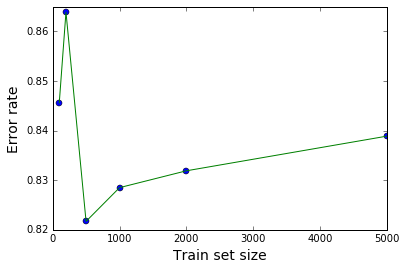

In [77]:
err_lst = []
trainset_size = [100, 200, 500, 1000, 2000, 5000]
for i in trainset_size:
    err_lst.append(q1(i))
plt.plot(trainset_size,err_lst,'o')
plt.plot(trainset_size,err_lst,'-')
plt.xlabel("Train set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)

__Problem 2.__ Create confusion matrices2 for each experiment in Problem 1. Color code and report your results. You may use built-in implementations to generate confusion matrices. What insights can you get about the performance of your algorithm from looking at the confusion matrix?

In [82]:
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(verify_labels_subset,result))

Confusion matrix:
[[809  40  11  50  11  11  30   2   9  12]
 [395 128  43 175  44  61 139  43  36  23]
 [191 109  46 184  48 110 119  65  47  18]
 [183 141  61 210  75 111 138  63  43  21]
 [232 119  54 171  50  95 122  75  60  24]
 [150  95  47 160  60 109 120  85  33  24]
 [159 124  64 175  57 112 132  72  42  19]
 [222 134  58 192  46 105 153  81  40  26]
 [285 144  41 160  51  67 116  39  42  32]
 [651 110  16 119  20  29  65  14  20  26]]


In [100]:
from sklearn import metrics
def plot_confusion_matrix(conf_mat, title='Confusion matrix'):
    plt.figure()
    plt.imshow(conf_mat, interpolation='nearest', cmap= plt.cm.YlOrRd)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

__Problem 3.__ Explain why cross-validation helps. Implement cross- validation5 and find the optimal value of the parameter C using 10- fold cross-validation on the training set with 10,000 examples. Train a linear SVM with this value of C. Please report your C value, the validation error rate, and your Kaggle score. If you used additional features, please (briefly) describe what features you added, removed, or modified.

Cross validation is important because often we have a machine learning model that depends on some parameter that we want to tune to optimize (speed, accuracy ..etc) . So cross validation splits up our sample so that we can conduct these experiments with different values of the model parameter and then it returns a score computed from the  mean squared error that enable us to evaluate whether that is a good value to use for the model or find the best parameter that gives the most accurate result.

In [26]:
N_total = 10000
data = train_img_flat[:N_total]
k=10
batch_size =shape(data)[0]/k
print batch_size

1000


In [27]:
s = set()
while len(s) < N_total:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

In [31]:
mega_train_subset=[]
mega_labels_subset=[]
for i in np.arange(k)+1:
#     print "Batch {}".format(i)
    train_subset = []
    labels_subset = []
#     print (i-1)*batch_size
#     print i*batch_size
#     print shape(rand_idx[(i-1)*batch_size:i*batch_size])
    for idx in rand_idx[(i-1)*batch_size:i*batch_size]:
        train_subset.append(train_img_flat[idx])
        labels_subset.append(train_label[:,0][idx])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
#     print shape(train_subset)
    mega_train_subset.append(train_subset)
    mega_labels_subset.append(labels_subset)
mega_train_subset = np.array(mega_train_subset)
mega_labels_subset = np.array(mega_labels_subset)
if (DEBUG): print shape(mega_train_subset)
if (DEBUG): print shape(mega_labels_subset)

In [84]:
import sklearn.metrics
mse_lst_for_diff_C = []
C_list = [1,10,100,1000] 
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k)+1:
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse= sklearn.metrics.mean_squared_error(verify_labels, result)
        print mse
        mse_err_lst.append(mse)
    print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=1
1.301
1.162
1.136
1.736
average mse:  1.33375
Testing C=10
1.601
1.721
1.268
1.493
average mse:  1.52075
Testing C=100
1.347
1.323
1.51
1.247
average mse:  1.35675
Testing C=1000
1.307
1.64
1.535
1.383
average mse:  1.46625


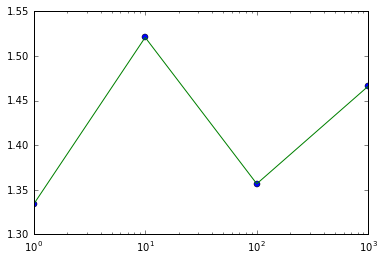

In [88]:
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

#References

- "1.4. Support Vector Machines." 1.4. Support Vector Machines — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 01 Feb. 2016.
- Markham, Kevin. "Simple Guide to Confusion Matrix Terminology." _Data School_. N.p., 25 Mar. 2014. Web. 01 Feb. 2016.
- "Confusion Matrix." Confusion Matrix — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 02 Feb. 2016.
- James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. "Chapter 5 Resampling Methods." _An Introduction to Statistical Learning: With Applications in R_. N.p.: Springer, n.d. 180-83. Print.